# Pandas for Data Visualization

This notebook focuses on `pandas` functions and methods that are essential for preparing and manipulating data before visualization. Effective data wrangling is a critical first step to creating meaningful plots.

## 1. Setup and Data Loading

First, let's import `pandas` and `seaborn` (to load a sample dataset).

In [1]:
import pandas as pd
import seaborn as sns

# Load the 'titanic' dataset for this tutorial
df = sns.load_dataset('titanic')

## 2. Inspecting the Data

Before visualizing, you need to understand your data's structure, types, and content.

### `head()` and `tail()`
View the first or last few rows of the DataFrame.

In [14]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### `info()`
Get a concise summary of the DataFrame, including data types and non-null values. This is crucial for identifying missing data that you might need to handle before plotting.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### `describe()`
Generate descriptive statistics for numerical columns. This is useful for understanding the distribution of your data.

In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. Data Aggregation and Transformation

Often, you need to summarize or reshape your data to prepare it for a specific plot.

### `value_counts()`
Count the occurrences of unique values in a Series. This is perfect for preparing data for a bar chart of categorical data.

In [5]:
# Count of passengers by class
class_counts = df['pclass'].value_counts()
print(class_counts)

pclass
3    491
1    216
2    184
Name: count, dtype: int64


This result can be directly plotted as a bar chart:

<Axes: title={'center': 'Passenger Count by Class'}, xlabel='pclass'>

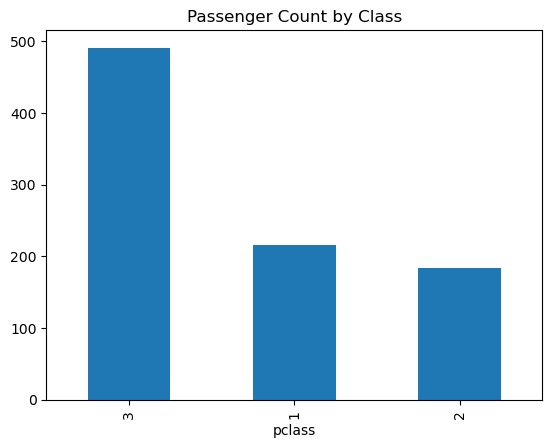

In [16]:
class_counts.plot(kind='bar', title='Passenger Count by Class')

### `groupby()`
Group data based on one or more columns and perform an aggregate function (e.g., mean, sum, count). This is one of the most powerful `pandas` methods for data analysis.

In [7]:
# Calculate the average age of passengers by sex and class
avg_age = df.groupby(['sex', 'pclass'])['age'].mean().unstack()
print(avg_age)

pclass          1          2          3
sex                                    
female  34.611765  28.722973  21.750000
male    41.281386  30.740707  26.507589


The resulting DataFrame is perfectly shaped for a grouped bar chart:

<Axes: title={'center': 'Average Age by Sex and Passenger Class'}, xlabel='sex'>

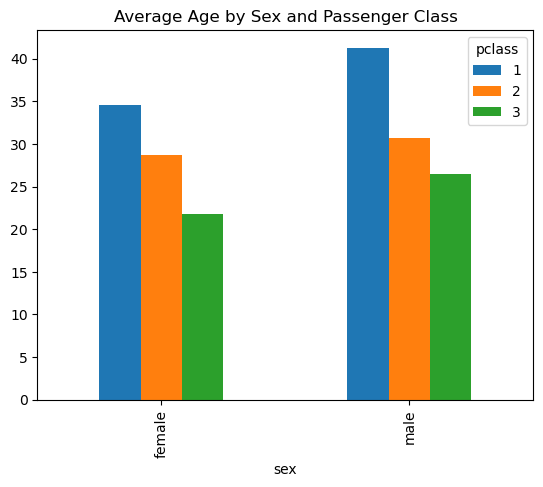

In [8]:
avg_age.plot(kind='bar', title='Average Age by Sex and Passenger Class')

### `pivot_table()`
Create a spreadsheet-style pivot table as a DataFrame. This is extremely useful for reshaping data for heatmaps or complex bar charts.

In [9]:
# Create a pivot table to show the survival rate by sex and class
survival_rate = df.pivot_table(index='sex', columns='pclass', values='survived', aggfunc='mean')
print(survival_rate)

pclass         1         2         3
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


This pivot table can be directly used to create a heatmap:

Text(0.5, 1.0, 'Survival Rate by Sex and Class')

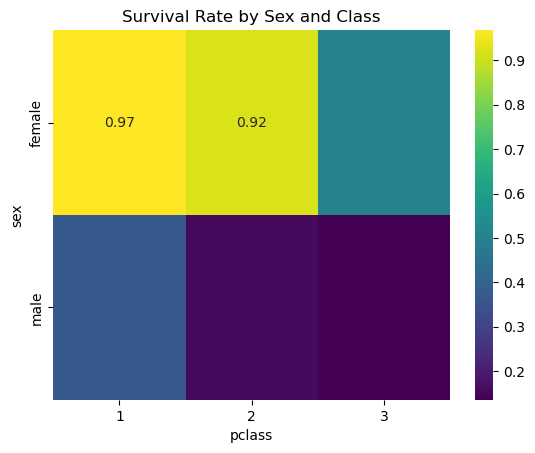

In [10]:
sns.heatmap(survival_rate, annot=True, cmap='viridis').set_title('Survival Rate by Sex and Class')

## 4. Filtering and Sorting

Often you want to visualize only a subset of your data, or present it in a specific order.

### `sort_values()`
Sort the DataFrame by one or more columns. This is useful for creating ordered bar charts.

In [11]:
# Get the average fare by embark town and sort it
avg_fare = df.groupby('embark_town')['fare'].mean().sort_values(ascending=False)
print(avg_fare)

embark_town
Cherbourg      59.954144
Southampton    27.079812
Queenstown     13.276030
Name: fare, dtype: float64


<Axes: title={'center': 'Average Fare by Embark Town'}, xlabel='embark_town'>

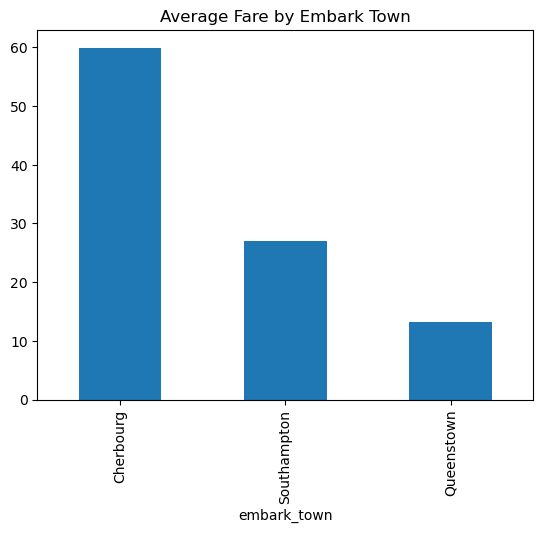

In [12]:
avg_fare.plot(kind='bar', title='Average Fare by Embark Town')

### Filtering with boolean indexing
Select subsets of data based on conditions. This is fundamental for focusing your visualization on specific segments.

<Axes: title={'center': 'Age Distribution of Adult Passengers'}, ylabel='Frequency'>

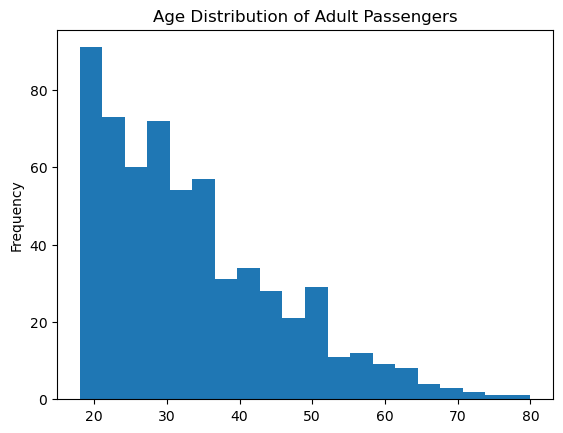

In [13]:
# Filter for only adult passengers
adults_df = df[df['age'] >= 18]

# Visualize the age distribution of adults
adults_df['age'].plot(kind='hist', bins=20, title='Age Distribution of Adult Passengers')